In [ ]:
# Import Matplotlib
import matplotlib.pyplot as plt
import pandas as pd


In [82]:
# Read statistics.json file
statistics = pd.read_json("statistics-10replicas-10second.json", orient="records").T
statistics.reset_index(inplace=True)

# remove index column
statistics.drop("index", axis=1, inplace=True)

statistics


,id,runId,name,timestamp,batchId,numInputRows,inputRowsPerSecond,processedRowsPerSecond,durationMs,stateOperators,sources,sink
0,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:01:18.206Z,7437,36,9.708738,10.022272,"{'addBatch': 3483, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...
1,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:01:21.799Z,7438,35,9.741163,10.862818,"{'addBatch': 3111, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...
2,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:01:25.022Z,7439,31,9.618368,8.852085,"{'addBatch': 3382, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...
3,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:01:28.525Z,7440,34,9.705966,9.343226,"{'addBatch': 3519, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...
4,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:01:32.165Z,7441,36,9.89011,10.312231,"{'addBatch': 3382, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...
...,...,...,...,...,...,...,...,...,...,...,...,...
699,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:41:50.522Z,8136,33,9.725906,10.865986,"{'addBatch': 2906, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...
700,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:41:53.559Z,8137,29,9.548897,8.082497,"{'addBatch': 3480, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...
701,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:41:57.148Z,8138,35,9.75202,10.460251,"{'addBatch': 3210, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...
702,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:42:00.495Z,8139,33,9.859576,9.803922,"{'addBatch': 3254, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...


In [83]:
# statistics = pd.concat([statistics, pd.json_normalize(statistics["durationMs"])])
temp_df = pd.json_normalize(statistics["durationMs"])
temp_df


,addBatch,getBatch,latestOffset,queryPlanning,triggerExecution,walCommit
0,3483,0,1,71,3592,18
1,3111,0,2,71,3222,17
2,3382,0,2,82,3502,17
3,3519,0,1,71,3639,17
4,3382,0,1,73,3491,16
...,...,...,...,...,...,...
699,2906,0,2,90,3036,17
700,3480,0,2,70,3588,17
701,3210,0,1,78,3346,17
702,3254,0,5,71,3366,17


In [88]:
# df = pd.concat([statistics, temp_df])
# df

statistics = statistics.join(temp_df)
statistics.head()


,id,runId,name,timestamp,batchId,numInputRows,inputRowsPerSecond,processedRowsPerSecond,durationMs,stateOperators,sources,sink,addBatch,getBatch,latestOffset,queryPlanning,triggerExecution,walCommit
0,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:01:18.206Z,7437,36,9.708738,10.022272,"{'addBatch': 3483, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...,3483,0,1,71,3592,18
1,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:01:21.799Z,7438,35,9.741163,10.862818,"{'addBatch': 3111, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...,3111,0,2,71,3222,17
2,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:01:25.022Z,7439,31,9.618368,8.852085,"{'addBatch': 3382, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...,3382,0,2,82,3502,17
3,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:01:28.525Z,7440,34,9.705966,9.343226,"{'addBatch': 3519, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...,3519,0,1,71,3639,17
4,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T01:01:32.165Z,7441,36,9.89011,10.312231,"{'addBatch': 3382, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...,3382,0,1,73,3491,16


In [89]:
statistics[
    [
        "durationMs",
        "addBatch",
        "getBatch",
        "latestOffset",
        "queryPlanning",
        "triggerExecution",
        "walCommit",
    ]
]


,durationMs,addBatch,getBatch,latestOffset,queryPlanning,triggerExecution,walCommit
0,"{'addBatch': 3483, 'getBatch': 0, 'latestOffse...",3483,0,1,71,3592,18
1,"{'addBatch': 3111, 'getBatch': 0, 'latestOffse...",3111,0,2,71,3222,17
2,"{'addBatch': 3382, 'getBatch': 0, 'latestOffse...",3382,0,2,82,3502,17
3,"{'addBatch': 3519, 'getBatch': 0, 'latestOffse...",3519,0,1,71,3639,17
4,"{'addBatch': 3382, 'getBatch': 0, 'latestOffse...",3382,0,1,73,3491,16
...,...,...,...,...,...,...,...
699,"{'addBatch': 2906, 'getBatch': 0, 'latestOffse...",2906,0,2,90,3036,17
700,"{'addBatch': 3480, 'getBatch': 0, 'latestOffse...",3480,0,2,70,3588,17
701,"{'addBatch': 3210, 'getBatch': 0, 'latestOffse...",3210,0,1,78,3346,17
702,"{'addBatch': 3254, 'getBatch': 0, 'latestOffse...",3254,0,5,71,3366,17


In [91]:
# "durationMs": {
#   "addBatch": 3483,
#   "getBatch": 0,
#   "latestOffset": 1,
#   "queryPlanning": 71,
#   "triggerExecution": 3592,
#   "walCommit": 18
# },

statistics["durationMsJSON"] = statistics["durationMs"]

statistics["microbatchDurationMs"] = (
    statistics["addBatch"]
    + statistics["getBatch"]
    + statistics["latestOffset"]
    + statistics["queryPlanning"]
    + statistics["triggerExecution"]
    + statistics["walCommit"]
)

statistics[
    [
        "microbatchDurationMs",
        "addBatch",
        "getBatch",
        "latestOffset",
        "queryPlanning",
        "triggerExecution",
        "walCommit",
    ]
]



,microbatchDurationMs,addBatch,getBatch,latestOffset,queryPlanning,triggerExecution,walCommit
0,7165,3483,0,1,71,3592,18
1,6423,3111,0,2,71,3222,17
2,6985,3382,0,2,82,3502,17
3,7247,3519,0,1,71,3639,17
4,6963,3382,0,1,73,3491,16
...,...,...,...,...,...,...,...
699,6051,2906,0,2,90,3036,17
700,7157,3480,0,2,70,3588,17
701,6652,3210,0,1,78,3346,17
702,6713,3254,0,5,71,3366,17


In [92]:
# convert timestamp to datetime
statistics["timestamp"] = pd.to_datetime(statistics["timestamp"])
statistics["timestamp"]


0     2022-06-29 01:01:18.206000+00:00
1     2022-06-29 01:01:21.799000+00:00
2     2022-06-29 01:01:25.022000+00:00
3     2022-06-29 01:01:28.525000+00:00
4     2022-06-29 01:01:32.165000+00:00
                    ...               
699   2022-06-29 01:41:50.522000+00:00
700   2022-06-29 01:41:53.559000+00:00
701   2022-06-29 01:41:57.148000+00:00
702   2022-06-29 01:42:00.495000+00:00
703   2022-06-29 01:42:03.862000+00:00
Name: timestamp, Length: 704, dtype: datetime64[ns, UTC]

In [93]:
# from string import Template

# class DeltaTemplate(Template):
#     delimiter = '%'

# def strfdelta(tdelta, fmt):
#     d = {}
#     l = {'D': 86400, 'H': 3600, 'M': 60, 'S': 1}
#     rem = int(tdelta.seconds())

#     for k in ( 'D', 'H', 'M', 'S' ):
#         if "%{}".format(k) in fmt:
#             d[k], rem = divmod(rem, l[k])

#     t = DeltaTemplate(fmt)
#     return t.substitute(**d)


In [94]:
statistics["time"] = statistics["timestamp"] - statistics["timestamp"].min()
statistics["time"] = statistics["time"].apply(lambda x: x.total_seconds())
statistics[["timestamp", "time"]]


,timestamp,time
0,2022-06-29 01:01:18.206000+00:00,0.000
1,2022-06-29 01:01:21.799000+00:00,3.593
2,2022-06-29 01:01:25.022000+00:00,6.816
3,2022-06-29 01:01:28.525000+00:00,10.319
4,2022-06-29 01:01:32.165000+00:00,13.959
...,...,...
699,2022-06-29 01:41:50.522000+00:00,2432.316
700,2022-06-29 01:41:53.559000+00:00,2435.353
701,2022-06-29 01:41:57.148000+00:00,2438.942
702,2022-06-29 01:42:00.495000+00:00,2442.289


In [95]:
xticks = [
    x.total_seconds() for idx, x in enumerate(statistics["time"]) if idx % 10 == 0
]
xticks


AttributeError: 'float' object has no attribute 'total_seconds'

In [ ]:
len(xticks)


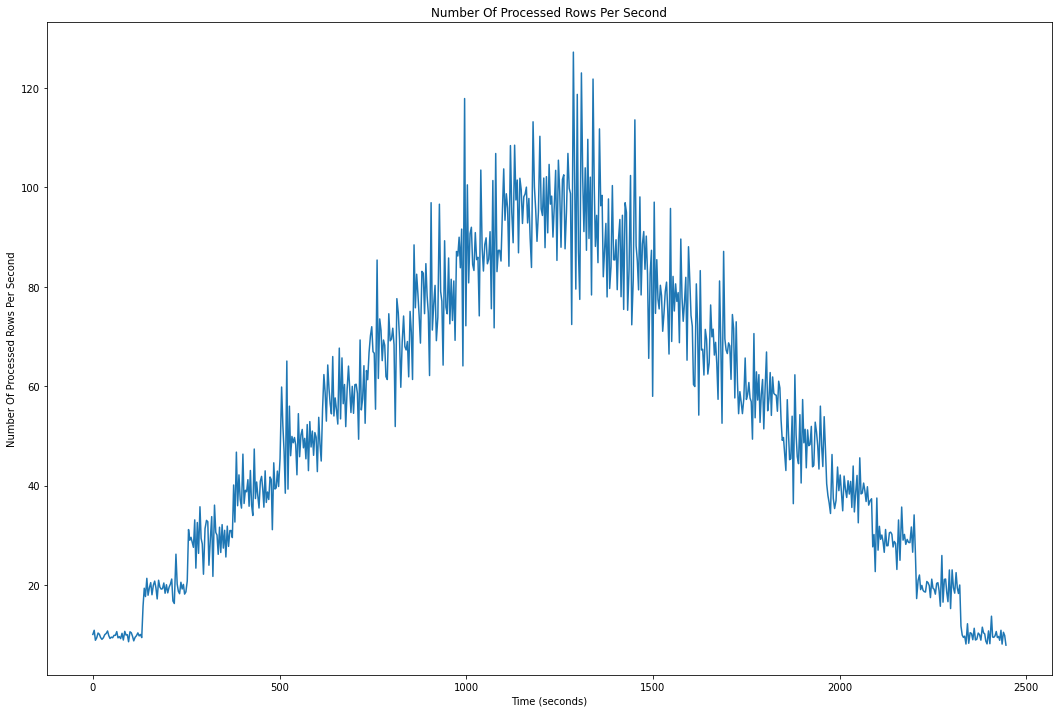

<Figure size 432x288 with 0 Axes>

In [96]:
fig, ax = plt.subplots(figsize=(18, 12))

# Plot processedRowsPerSecond vs timestamp line graph
ax.plot(statistics["time"], statistics["processedRowsPerSecond"])

plt.xlabel("Time (seconds)")
plt.ylabel("Number Of Processed Rows Per Second")
plt.title("Number Of Processed Rows Per Second")

plt.show()

# save
plt.savefig("processedRowsPerSecond.png")


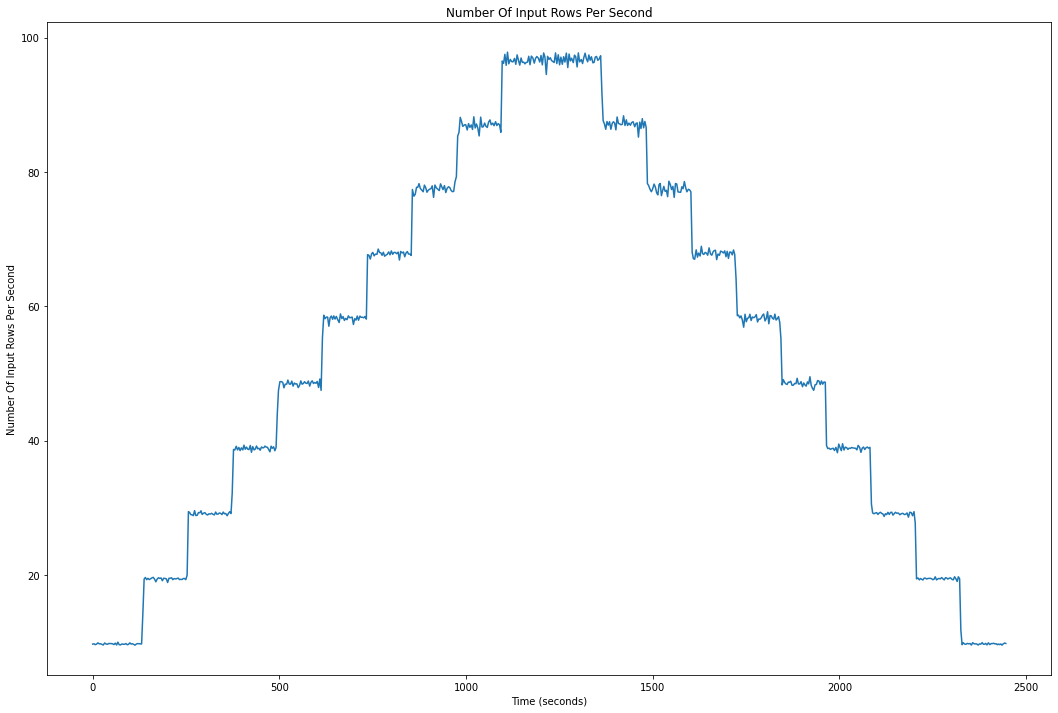

<Figure size 432x288 with 0 Axes>

In [97]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(18, 12))

# Plot inputRowsPerSecond vs timestamp line graph
ax.plot(statistics["time"], statistics["inputRowsPerSecond"])

plt.xlabel("Time (seconds)")
plt.ylabel("Number Of Input Rows Per Second")
plt.title("Number Of Input Rows Per Second")

plt.show()

# save
plt.savefig("inputRowsPerSecond.png")


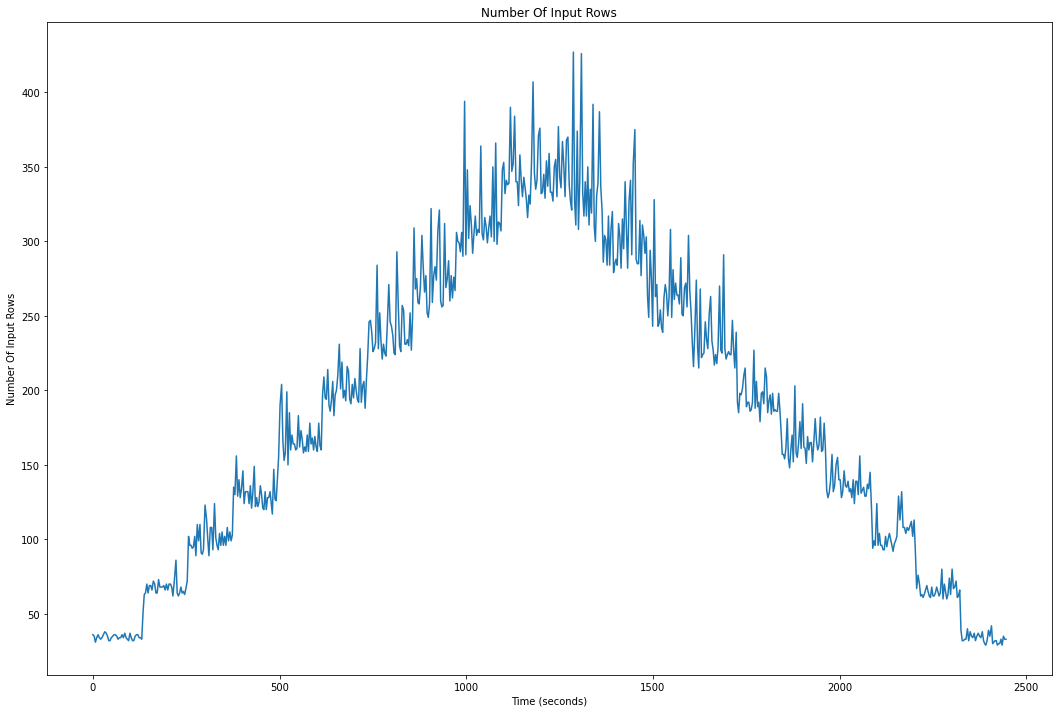

<Figure size 432x288 with 0 Axes>

In [98]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(18, 12))

# Plot numInputRows vs timestamp line graph
ax.plot(statistics["time"], statistics["numInputRows"])

# define timestamp labels
# timestamp_labels = [str(x) for x in statistics['timestamp']]
# myFmt = mdates.DateFormatter('%H:%M:%S')
# ax.xaxis.set_major_formatter(myFmt)

# set x-axis label dynamically
# xticks = [x for idx, x in enumerate(statistics['time']) if idx % 2000 == 0]
# ax.set_xticks(xticks)
# plt.xticks(xticks)

plt.xlabel("Time (seconds)")
plt.ylabel("Number Of Input Rows")
plt.title("Number Of Input Rows")

plt.show()

# save
plt.savefig("numInputRows.png")


In [101]:
statistics["microbatchDurationMs"].describe()

count     704.000000
mean     6935.894886
std       529.803555
min      5892.000000
25%      6569.500000
50%      6830.000000
75%      7170.750000
max      9037.000000
Name: microbatchDurationMs, dtype: float64

In [102]:
# check if columns has NaN
statistics["microbatchDurationMs"].isnull().values.any()

False

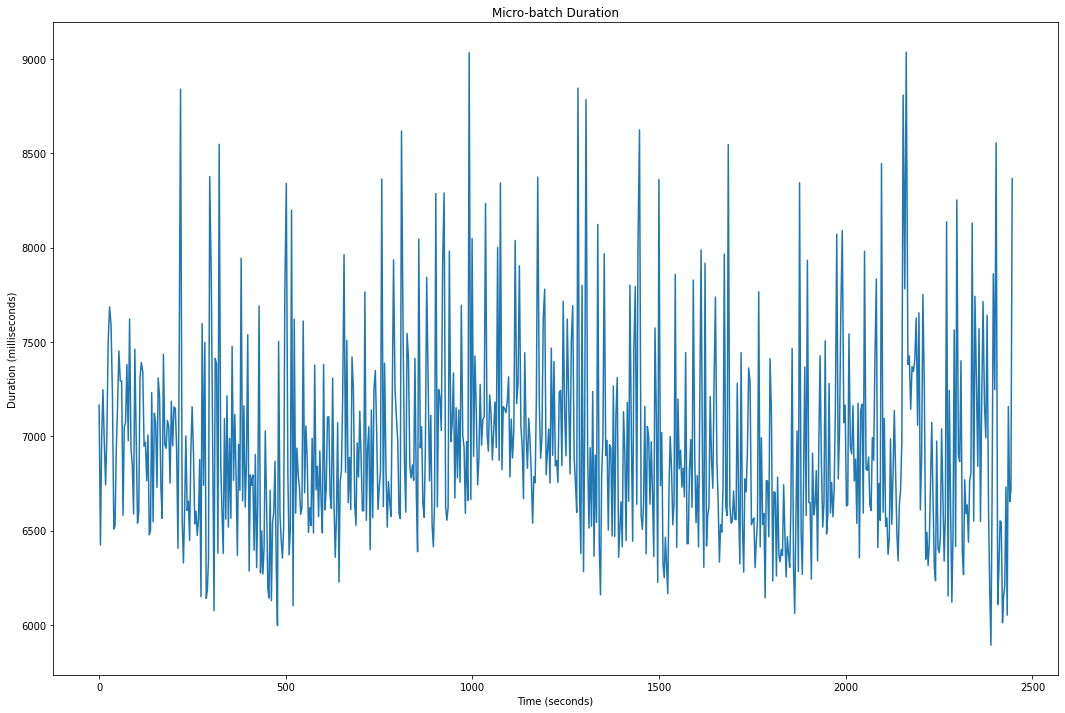

<Figure size 432x288 with 0 Axes>

In [100]:
# Micro-batch Duration
fig, ax = plt.subplots(figsize=(18, 12))

# Plot microbatchDurationMs vs timestamp line graph
ax.plot(statistics["time"], statistics["microbatchDurationMs"])

plt.xlabel("Time (seconds)")
plt.ylabel("Duration (milliseconds)")
plt.title("Micro-batch Duration")

plt.show()

# save
plt.savefig("microbatchDurationMs.png")


In [103]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 7.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 12.9 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/home/kayser/.cache/pypoetry/virtualenvs/spark-ml-training-xDY9FCqV-py3.10/bin/python -m pip install --upgrade pip' command.


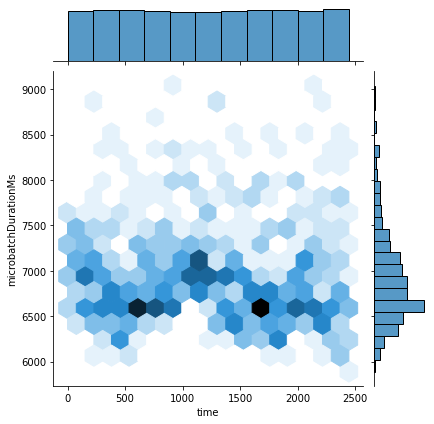

In [109]:
# Import library
import seaborn as sns

# Plot the Marginal Histogram
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=statistics["time"], y=statistics["microbatchDurationMs"], kind='hex')

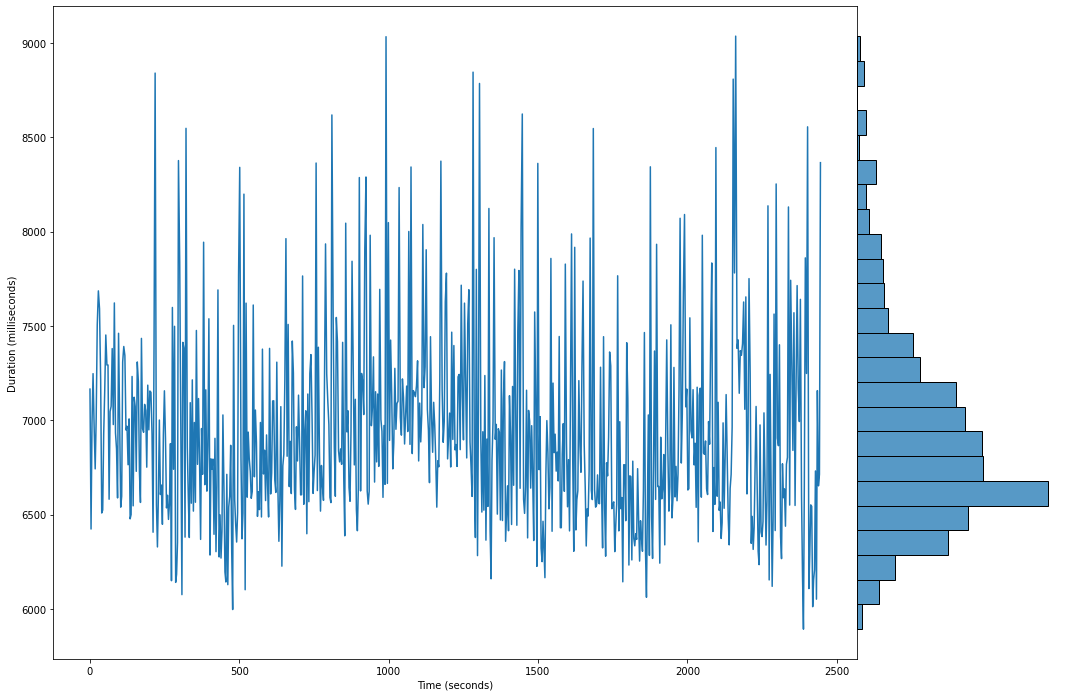

<Figure size 432x288 with 0 Axes>

In [132]:
# Plot 2 subplots
f, ax = plt.subplots(1, 2, figsize=(18, 12), gridspec_kw={"width_ratios": (.8, .2)})

sns.lineplot(x=statistics["time"], y=statistics["microbatchDurationMs"], ax=ax[0])
sns.histplot(data=statistics, y="microbatchDurationMs", ax=ax[1])

# remove yticks, label
ax[1].set_yticks([])
ax[1].set_ylabel("")
ax[1].set_xticks([])
ax[1].set_xlabel("")
ax[1].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)

ax[0].set_xlabel("Time (seconds)")
ax[0].set_ylabel("Duration (milliseconds)")

plt.show()

# save
plt.savefig("microbatchDurationMs.png")